In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

import time


In [2]:
wines = pd.read_csv("./Q3_winequalityN.csv")
wines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
wines["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [4]:
wines = wines.dropna().reset_index(drop=True)
wines.info()

X = wines[wines.columns[1:]]
y = wines[wines.columns[0]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


CLASS_NUMBER = 2
def plotConfusionMatrix(confmatrix, title, color):
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(confmatrix, annot=True, cmap=color)
    ax.set_title(title+' Confusion Matrix\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(list(map(str, np.arange(0,CLASS_NUMBER))))
    ax.yaxis.set_ticklabels(list(map(str, np.arange(0,CLASS_NUMBER))))
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 656.5+ KB


## 6.1 Sequential Forward Selection (SFS)

Feature Selector adds (forward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add based on the cross-validation score of an estimator. In the case of unsupervised learning, this Sequential Feature Selector looks only at the features (X), not the desired outputs (labels).

Input: $Y={y_1,y_2,...,y_d}$

* The SFS algorithm takes the whole `d`-dimensional feature set as input.

Output: $X_k={x_j|j=1,2,...,k;x_j∈Y}$, where $k=(0,1,2,...,d)$

* SFS returns a subset of features; the number of selected features k, where $k<d$, has to be specified a priori. 

Initialization: $X_0=∅, k=0$

* We initialize the algorithm with an empty set ∅ ("null set") so that $k=0$ (where k is the size of the subset).

Step 1 (Inclusion):

$x^+ = argmax J(X_k+x), where: x∈Y−X_k$

$X_{k+1}=X_k+x^+$

$k=k+1$

Go to Step 1

* in this step, we add an additional feature, $x^+$, to our feature subset $X_k$.
* $x^+$ is the feature that maximizes our criterion function, that is, the feature that is associated with the best classifier performance if it is added to $X_k$.

* We repeat this procedure until the termination criterion is satisfied.

***Termination: k=p***

We add features from the feature subset $X_k$ until the feature subset of size $k$ contains the number of desired features $p$ that we specified a priori.


### SFS result: 

Two features have been choosen by using SFS algorithem:
* [`free sulfur dioxide`, `total sulfur dioxide`]



Train Accuracy :  0.9872340425531915 
Test Accuracy :  0.9876256767208044


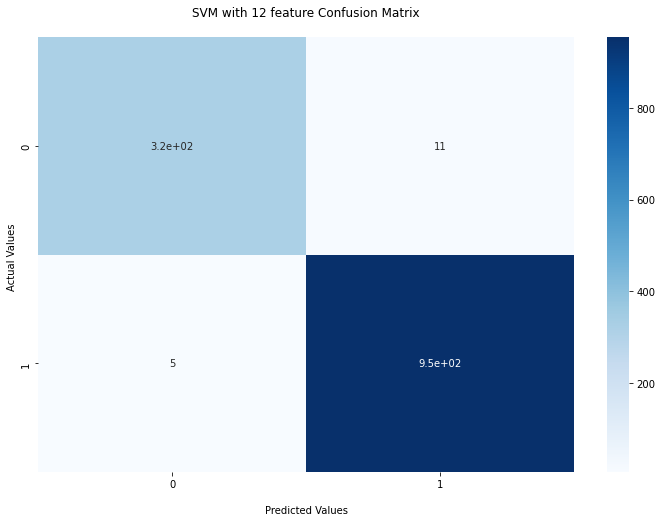

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



svm = SVC(kernel='linear')
svm = svm.fit(X_train,y_train)
print("Train Accuracy : ",svm.score(X_train, y_train), "\nTest Accuracy : ",svm.score(X_test, y_test))
svm.score(X_train, y_train), svm.score(X_test, y_test)
#plotSVC(svm_model = rbfSvmOVR,title = "SVM with RBF Kernel, one-vs-rest")
rbfSvmPred = svm.predict(X_test)

rbfSvmPred
confMatrix = confusion_matrix(y_test, rbfSvmPred)
plotConfusionMatrix(confMatrix,"SVM with 12 feature", "Blues")

In [6]:
svm = SVC(kernel='rbf')
st = time.time()
sfs = SequentialFeatureSelector(svm, n_features_to_select=2)
sfs.fit(X_train, y_train)
end = time.time()
print("SFS Execution Time : ", end - st, "ms")
sfs.get_support()


SFS Execution Time :  30.650034427642822 ms


array([False, False, False, False, False,  True,  True, False, False,
       False, False, False])

In [8]:
sfs.get_feature_names_out(input_features=wines.columns[1:])

array(['free sulfur dioxide', 'total sulfur dioxide'], dtype=object)

In [9]:
X_train_transform = sfs.transform(X_train)
X_test_transform = sfs.transform(X_test)

In [10]:
X_train_transform.shape, X_test_transform.shape

((5170, 2), (1293, 2))

Train Accuracy :  0.9340425531914893 
Test Accuracy :  0.9187935034802784


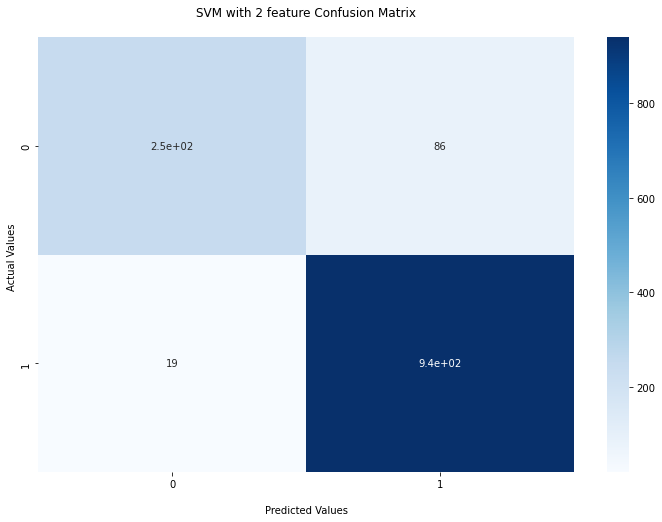

In [11]:
svm = svm.fit(X_train_transform,y_train)
print("Train Accuracy : ",svm.score(X_train_transform, y_train), "\nTest Accuracy : ",svm.score(X_test_transform, y_test))
svm.score(X_train_transform, y_train), svm.score(X_test_transform, y_test)
#plotSVC(svm_model = rbfSvmOVR,title = "SVM with RBF Kernel, one-vs-rest")
rbfSvmOVRPred = svm.predict(X_test_transform)

rbfSvmOVRPred
confMatrix = confusion_matrix(y_test, rbfSvmOVRPred)
plotConfusionMatrix(confMatrix,"SVM with 2 feature", "Blues")

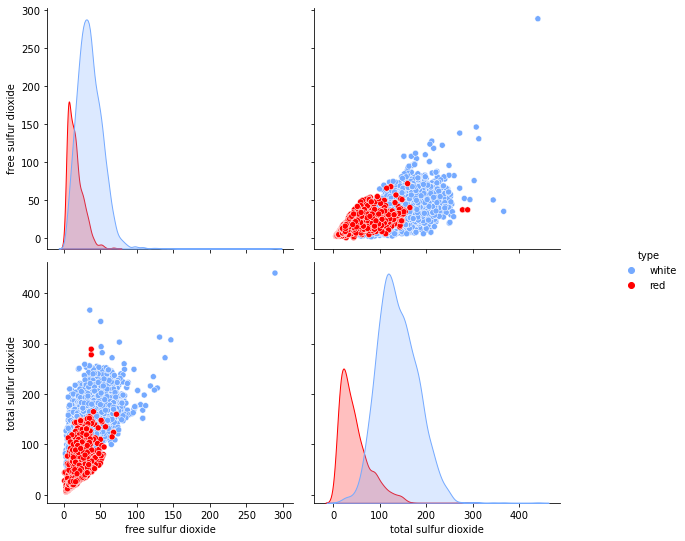

In [15]:
palette = {"white": '#75AAFF', 
    "red": "red"
    }


sfs_cols = list(sfs.get_feature_names_out(input_features=wines.columns[1:]))
#print(*rfe_cols)
g = sns.pairplot(wines, vars = sfs_cols,
                 hue="type", palette=palette)

g.fig.set_size_inches(10,8)

## 6.2 Recursive Feature Elimination(RFE) 

* This algorithm fits a model and determines how significant features explain the variation in the dataset. Once the feature importance has been determined, it then removes those less important features one at a time in each iteration. These features are repeatedly eliminated until a certain threshold(optimal number of features needed) is met.

* Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

* This method should work well for most linear type models and will run relatively quickly, which is a bonus. RFE is also computationally less complex than SFS

### RFE result: 

Two features have been choosen by using RFE algorithem:
* [`volatile acidity`, `chlorides`]

In [14]:
from sklearn.feature_selection import RFE

### By using the non-linear kernel, the error will occur
"https://datascience.stackexchange.com/questions/104667/why-do-i-get-an-valueerror-for-an-svr-model-with-rfe-but-only-when-using-pipeli"


svm = SVC(kernel='linear')
st = time.time()
rfe = RFE(svm, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)
end = time.time()
print("RFE Execution Time : ", end - st, "s")

rfe.get_support()

RFE Execution Time :  2.1706597805023193 s


array([False,  True, False, False,  True, False, False, False, False,
       False, False, False])

In [65]:
rfe.get_feature_names_out(input_features=wines.columns[1:])

array(['volatile acidity', 'chlorides'], dtype=object)

In [61]:
X_train_transform = rfe.transform(X_train)
X_test_transform = rfe.transform(X_test)

Train Accuracy :  0.8899419729206963 
Test Accuracy :  0.8816705336426914


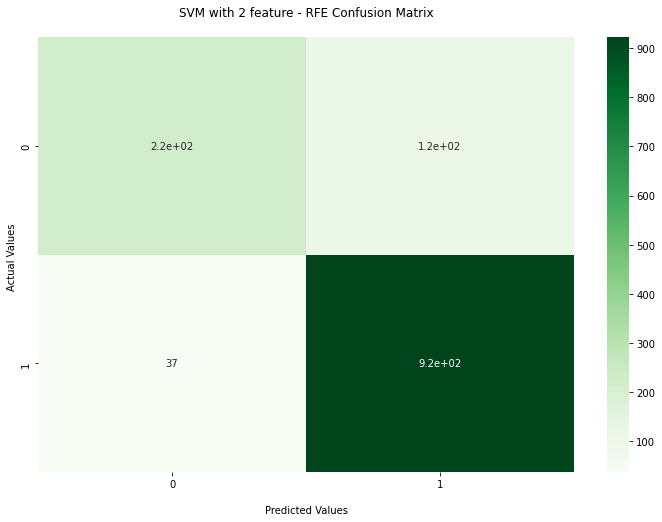

In [64]:
svm = svm.fit(X_train_transform,y_train)
print("Train Accuracy : ",svm.score(X_train_transform, y_train), "\nTest Accuracy : ",svm.score(X_test_transform, y_test))
svm.score(X_train_transform, y_train), svm.score(X_test_transform, y_test)
#plotSVC(svm_model = rbfSvmOVR,title = "SVM with RBF Kernel, one-vs-rest")
SvmPred = svm.predict(X_test_transform)

SvmPred
confMatrix = confusion_matrix(y_test, SvmPred)
plotConfusionMatrix(confMatrix,"SVM with 2 feature - RFE", "Greens")

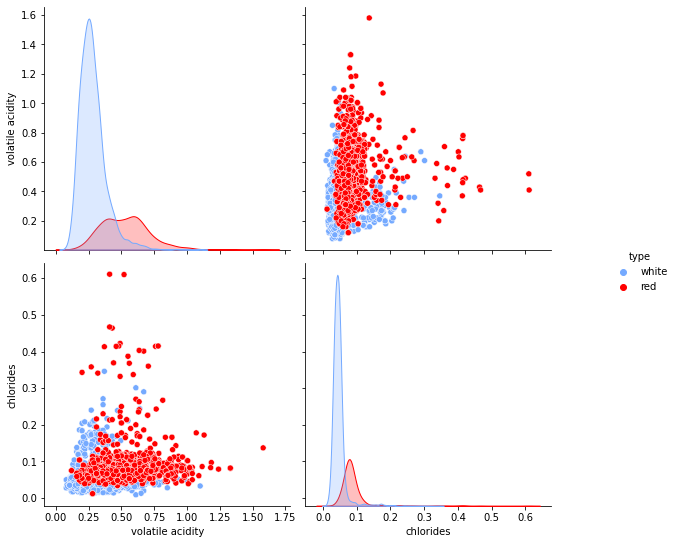

In [16]:
palette = {"white": '#75AAFF', 
    "red": "red"
    }

rfe_cols = list(rfe.get_feature_names_out(input_features=wines.columns[1:]))
#print(*rfe_cols)
g = sns.pairplot(wines, vars = rfe_cols,
                 hue="type", palette=palette)

g.fig.set_size_inches(10,8)

## 6.3

**Accuracy** : According to the models, when we use SFS, we reach higher accuracy. as we can see in the results, the features were chosen by SFS, lead to better discrimination.

**Time** : Run time for SFS is a longer than RFE but is manageable. The main benefit is that this method chooses on its own and can be more intelligent than RFE.

Two features have been choosen by using SFS algorithem:
* [`free sulfur dioxide`, `total sulfur dioxide`]
* SFS Execution Time :  30.65 s


Two features have been choosen by using RFE algorithem:
* [`volatile acidity`, `chlorides`]
* RFE Execution Time :  2.17 s


#### left for SFS features , right for RFE features

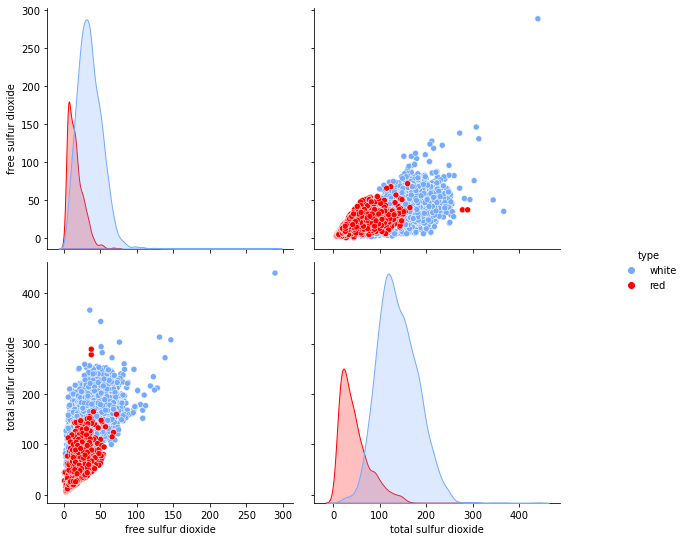 | 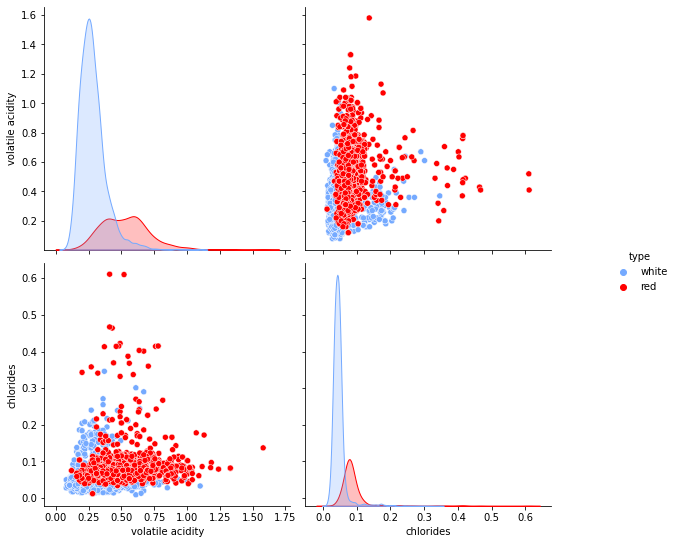



